### Hypothesis Testing: Pitch Memo

- For my hypothesis testing, I want to examine US Immigration and Customs Enforcement arrests and crime conviction rates for marijuana posession

- Trac (a database maintained by syracuse university through FOIA requests) has data on FY15-18's ICE arrests, people's nationalities, most serious crime conviction, among others. 

- For the purpose of this hypothesis testing, I would like to focus on the rate at which an arrested immigrant is convicted for possession of marijuana, and whether the rate can be explained by whether they are of Mexican citizenship.

In [1]:
# importing and set up
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
mar_df = pd.read_csv("countries-marijuana.csv")
mar_df

,year,rate,country
0,2015,1.6,Mexico
1,2016,1.6,Mexico
2,2017,1.7,Mexico
3,2018,1.6,Mexico
4,2015,0.7,other
5,2016,0.6,other
6,2017,0.7,other
7,2018,0.8,other


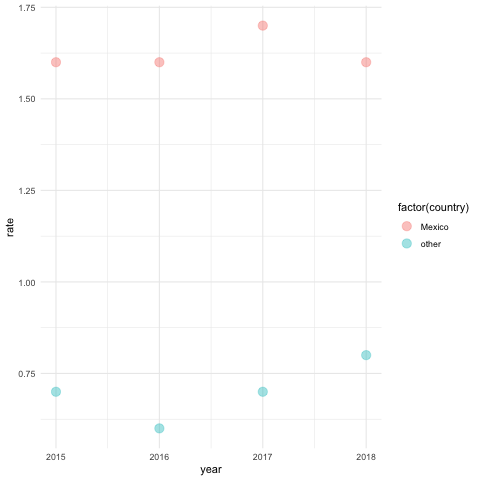

In [4]:
%%R -i mar_df

#plot the distribution
ggplot(mar_df) +
    aes(x=year, y=rate, color=factor(country)) +
    geom_point(size=4, alpha=.4) +
    theme_minimal()

In [5]:
%%R 

mexico = mar_df %>% filter(country=='Mexico')
other = mar_df %>% filter(country=='other')

t.test(mexico$rate, other$rate)


	Welch Two Sample t-test

data:  mexico$rate and other$rate
t = 19.323, df = 4.9726, p-value = 7.187e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8017386 1.0482614
sample estimates:
mean of x mean of y 
    1.625     0.700 



The p value presented in this t test is very small. Therefore, a statistician can say with a high level of confidence that arrested immigrants of Mexican nationality do not have the same conviction rate as all others for posessing marijuana. 

A reader-facing person may say this:
Mexican immigrants who receive convictions from ICE arrests are more likely than immigrants of other nationalities to be convicted for marijuana posession. 
